In [75]:
#import all library
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import time
import schedule
import requests
import seaborn as sns
import numpy as np


In [76]:
# assign your website to scrape , in this case amazon
web = 'https://www.amazon.com'
options = webdriver.ChromeOptions()

driver = webdriver.Chrome()
driver.get(web)

driver.implicitly_wait(5)
# select the keyword to Scrape
keyword = "wireless"
search = driver.find_element(By.ID, 'twotabsearchtextbox')
search.send_keys(keyword)
# click search button
search_button = driver.find_element(By.ID, 'nav-search-submit-button')
search_button.click()

driver.implicitly_wait(5)

In [77]:
#we create a dataframe to collect all data scraped
product_name = []
product_asin = []
product_price = []
product_ratings = []
product_ratings_num = []
product_link = []
df = pd.DataFrame(columns=['Name','price','rating','#rating' , 'link'])

In [78]:
#we send data as message on channel on telegram
#step:
# 1. create bot and extract token
# 2. add the bot to a new channel and extract the chat_id
def send_data():
    TOKEN = "5532274185:AAGE8CQOwV6i6VtER1xBAfhciVv4WBDSLWA"
    chat_id = "-1001774376845"

    for row in df.itertuples():
        str_link = row.link
        str_name = row.Name
        str_price = row.price
        print("🔴 ",str_price," 🔴","\n",str_name,"\n",str_link)
        text = "🔴 "+str(str_price)+" $"+" 🔴"+"%0A"+str_name+"%0A"+str_link
        url = f"https://api.telegram.org/bot{TOKEN}/sendMessage?chat_id={chat_id}&text={text}"
        #we can select the ratio of messages
        time.sleep(2)
        r = requests.get(url)
        print(r.json())

In [83]:
#MAIN without function
#reset dataframe
df = pd.DataFrame(columns=['Name','price','rating','#rating' , 'link'])
#collect all data and create df with all data
#the item are the boxes of the product
items = wait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))
for item in items:
    # find name
    name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]')
    product_name.append(name.text)

    # find price
    whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
    fraction_price = item.find_elements(By.XPATH, './/span[@class="a-price-fraction"]')

    if whole_price != [] and fraction_price != []:
        price = '.'.join([whole_price[0].text, fraction_price[0].text])
    else:
        price = 0
    product_price.append(price)

    # find ratings box
    ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')

    # find ratings and ratings_num
    if ratings_box != []:
        ratings = ratings_box[0].get_attribute('aria-label')
        ratings_num = ratings_box[1].get_attribute('aria-label')
    else:
        ratings, ratings_num = 0, 0

    product_ratings.append(ratings)
    product_ratings_num.append(str(ratings_num))

    # find link
    boxlinks = driver.find_elements(By.XPATH, '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for boxlink in boxlinks:
        link = boxlink.get_attribute('href')
    #add a line on dataframe
    new_row = {'Name':name.text, 'price':price, 'rating':ratings, '#rating':str(ratings_num) , 'link':link}
    df = df.append(new_row, ignore_index=True)
for i in range(2,20):
    #the item are the boxes of the product
    items = wait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))
    for item in items:
        # find name
        name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]')
        product_name.append(name.text)

        # find price
        whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
        fraction_price = item.find_elements(By.XPATH, './/span[@class="a-price-fraction"]')

        if whole_price != [] and fraction_price != []:
            price = '.'.join([whole_price[0].text, fraction_price[0].text])
        else:
            price = 0
        product_price.append(price)

        # find ratings box
        ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')

        # find ratings and ratings_num
        if ratings_box != []:
            ratings = ratings_box[0].get_attribute('aria-label')
            ratings_num = ratings_box[1].get_attribute('aria-label')
        else:
            ratings, ratings_num = 0, 0

        product_ratings.append(ratings)
        product_ratings_num.append(str(ratings_num))

        # find link
        boxlinks = driver.find_elements(By.XPATH, '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
        for boxlink in boxlinks:
            link = boxlink.get_attribute('href')
        #add a line on dataframe
        new_row = {'Name':name.text, 'price':price, 'rating':ratings, '#rating':str(ratings_num) , 'link':link}
        df = df.append(new_row, ignore_index=True)
    page_button = driver.find_element(By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    page_button.click()
    time.sleep(2)
driver.quit()
#convert rating in cutted string
for i, row in df.iterrows():
    ifor_val = 2
    txt=df.at[i,'rating']
    x = str(txt).split(" ", 1)
    df.at[i,'rating'] = str(x[0])

#send data to the channel   
#send_data()


C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\U

C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\U

C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/1222270105.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\U

KeyboardInterrupt: 

In [ ]:
#Analyze price - rating
for i, row in df.iterrows():
    ifor_val = 2
    txt=df.at[i,'rating']
    x = str(txt).split(".", 1)
    df.at[i,'rating'] = str(x[0])
import seaborn as sns
import numpy as np
df['price'] = df['price'].astype(np.float)
df['rating'] = df['rating'].astype(np.float)
avg = df["price"].mean()
print(avg)
graph=sns.barplot(y=df['price'], x=df['rating'])
graph.axhline(avg)



DA QUI IN GIU TUTTO IL CODICE PER TESTARE

In [ ]:
#tutti i link della pagina
links = driver.find_elements(By.XPATH, '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
l=[]
for link in links:
    value = link.get_attribute('href')
    print(value)
    l.append(value)
print("_________________________________________________________")
print(l)


In [ ]:
#serve a mandare i messaggi sul canale
import time
import schedule
import requests

import requests
TOKEN = "5532274185:AAGE8CQOwV6i6VtER1xBAfhciVv4WBDSLWA"
chat_id = "-1001774376845"
text = "ciaooooo"
url = f"https://api.telegram.org/bot{TOKEN}/sendMessage?chat_id={chat_id}&text={text}"
# url = f"https://api.telegram.org/bot{TOKEN}/getUpdates"
r = requests.get(url)
print(r.json())

In [ ]:
for i in range(2,20):
    #s-pagination-item s-pagination-next s-pagination-button s-pagination-separator
    page_button = driver.find_element(By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    page_button.click()
    time.sleep(2)



In [84]:
for i, row in df.iterrows():
    ifor_val = 2
    txt=df.at[i,'rating']
    x = str(txt).split(" ", 1)
    df.at[i,'rating'] = str(x[0])
df

,Name,price,rating,#rating,link
0,NADAMOO Wireless Barcode Scanner Compatible wi...,48.99,4.5,793,https://www.amazon.com/gp/slredirect/picassoRe...
1,Hollyland Lark M1 Wireless Lavalier Microphone...,149.00,4.8,8,https://www.amazon.com/gp/slredirect/picassoRe...
2,MEATER Plus | Smart Meat Thermometer with Blue...,99.95,4.6,"24,272",https://www.amazon.com/gp/slredirect/picassoRe...
3,TOZO T6 True Wireless Earbuds Bluetooth Headph...,29.99,4.4,"215,309",https://www.amazon.com/gp/slredirect/picassoRe...
4,TOZO T10 Bluetooth 5.3 Wireless Earbuds with W...,25.98,4.3,"311,187",https://www.amazon.com/gp/slredirect/picassoRe...
...,...,...,...,...,...
67,Prcoet Poe Injector 802.3at.Provides 30W PoE P...,65.00,0,0,https://www.amazon.com/gp/slredirect/picassoRe...
68,"Wireless Gaming Keyboard and Mouse,Rainbow Bac...",47.99,4.1,"6,554",https://www.amazon.com/gp/slredirect/picassoRe...
69,Beats Studio Buds – True Wireless Noise Cancel...,0,4.4,"37,841",https://www.amazon.com/gp/slredirect/picassoRe...
70,Beats Flex Wireless Earbuds – Apple W1 Headpho...,0,4.4,"41,043",https://www.amazon.com/gp/slredirect/picassoRe...


88.28041666666658


C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/3715031948.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['price'] = df['price'].astype(np.float)
C:\Users\Domenico\AppData\Local\Temp/ipykernel_18232/3715031948.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['rating'] = df['rating'].astype(np.float)


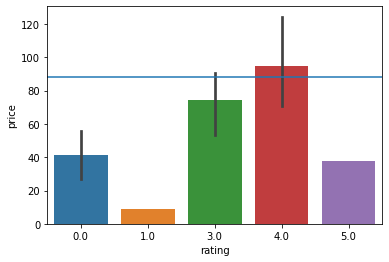

In [91]:
for i, row in df.iterrows():
    ifor_val = 2
    txt=df.at[i,'rating']
    x = str(txt).split(".", 1)
    df.at[i,'rating'] = str(x[0])
import seaborn as sns
import numpy as np
df['price'] = df['price'].astype(np.float)
df['rating'] = df['rating'].astype(np.float)
avg = df["price"].mean()
print(avg)
graph=sns.barplot(y=df['price'], x=df['rating'])
graph.axhline(avg)


In [69]:
df

,Name,price,rating,#rating,link
0,SABRENT 2.4GHz Rechargeable Wireless Mouse wit...,12.99,4.4,"10,306",https://www.amazon.com/gp/slredirect/picassoRe...
1,Amaboo 10.1'' WiFi Digital Picture Frames Smar...,89.99,4.5,32,https://www.amazon.com/gp/slredirect/picassoRe...
2,MEATER Plus | Smart Meat Thermometer with Blue...,99.95,4.6,"24,272",https://www.amazon.com/gp/slredirect/picassoRe...
3,TOZO T6 True Wireless Earbuds Bluetooth Headph...,29.99,4.4,"215,309",https://www.amazon.com/gp/slredirect/picassoRe...
4,"Brother Compact Monochrome Laser Printer, HLL2...",189.99,4.5,"4,843",https://www.amazon.com/gp/slredirect/picassoRe...
5,TOZO T10 Bluetooth 5.3 Wireless Earbuds with W...,25.98,4.3,"311,187",https://www.amazon.com/gp/slredirect/picassoRe...
6,HyperX Cloud Stinger Core - Wireless Gaming He...,0,4.4,"16,853",https://www.amazon.com/gp/slredirect/picassoRe...
7,"NAMCIM Wireless HDMI Transmitter and Receiver,...",129.99,4.8,"5,999",https://www.amazon.com/gp/slredirect/picassoRe...
8,Bose SoundLink Around Ear Wireless Headphones ...,0,4.6,"30,784",https://www.amazon.com/gp/slredirect/picassoRe...
9,Sennheiser RS 195 RF Wireless Headphone System...,356.96,4.2,816,https://www.amazon.com/gp/slredirect/picassoRe...


NameError: name 'plotPerColumnDistribution' is not defined

In [ ]:
#this function implement the scraper function
def scrape_page(main_df):
    df=main_df.copy()
    #the item are the boxes of the product
    items = wait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))
    for item in items:
        # find name
        name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]')
        product_name.append(name.text)

        # find price
        whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
        fraction_price = item.find_elements(By.XPATH, './/span[@class="a-price-fraction"]')

        if whole_price != [] and fraction_price != []:
            price = '.'.join([whole_price[0].text, fraction_price[0].text])
        else:
            price = 0
        product_price.append(price)

        # find ratings box
        ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')

        # find ratings and ratings_num
        if ratings_box != []:
            ratings = ratings_box[0].get_attribute('aria-label')
            ratings_num = ratings_box[1].get_attribute('aria-label')
        else:
            ratings, ratings_num = 0, 0

        product_ratings.append(ratings)
        product_ratings_num.append(str(ratings_num))

        # find link
        boxlinks = driver.find_elements(By.XPATH, '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
        for boxlink in boxlinks:
            link = boxlink.get_attribute('href')
        #add a line on dataframe
        new_row = {'Name':name.text, 'price':price, 'rating':ratings, '#rating':str(ratings_num) , 'link':link}
        df = df.append(new_row, ignore_index=True)
        return df



In [ ]:
#MAIN with PROBLEM should implement THREAD
#reset dataframe
df = pd.DataFrame(columns=['Name','price','rating','#rating' , 'link'])
#collect all data and create df with all data
df=scrape_page(df)
time.sleep(20)
for i in range(2,20):
    df=scrape_page(df)
    page_button = driver.find_element(By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    page_button.click()
    time.sleep(20)
driver.quit()

#send data to the channel   
send_data()
